# Problem:

If we flipped a fair coin 250 times, what is the expected length of the longest sequence of heads?  

---

Although this problem can be solved analytically, that's not the goal of this post. Problems like this are perfect use cases of Monte Carlo simulations. We won't get to an exact solution this way, however, we can get to a close approximation very fast. That is more often than not a good trade to make.  

Let's start by writing a `python` function which generates 250 random numbers, between 0 and 1, with equal probability. Here, 1 encodes `heads` and 0 encodes `tails`.

In [1]:
import numpy as np

def game(n=250):
    return np.random.randint(0, 2, n)

This function takes in a `keyword argument`, `n`, whose default value is 250. We can use it with any other number as well. Let's test it out, with, say, ten flips.

In [2]:
game(10)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Looks like this works. Now, given a sequence of 0s and 1s such as this one above, we need to find how long the **longest sequence of 1s** is. Let's do that by writing another function.

In [3]:
def longest_seq(input_sequence):
    s_max, s = 0, 0
    for i in input_sequence:
        s = s+1 if i else 0
        s_max = max(s, s_max)
    return s_max

Let's do a sanity check;

In [4]:
# Sanity check

for i in range(4):
    print('attempt %s' % i)
    seq = game(10)
    print(seq, 'longest sequence of 1s = ', longest_seq(seq))
    print('-'*40)

attempt 0
[1 1 0 1 0 0 1 1 0 0] longest sequence of 1s =  2
----------------------------------------
attempt 1
[1 1 1 1 1 0 0 0 1 0] longest sequence of 1s =  5
----------------------------------------
attempt 2
[1 1 1 1 1 0 1 1 0 1] longest sequence of 1s =  5
----------------------------------------
attempt 3
[0 1 0 1 0 1 1 1 1 0] longest sequence of 1s =  4
----------------------------------------


It looks good. Now, to get the (approximate) expected value that the question asks, let's do this **a lot of times** and get the average of the length of the longest subsequences.

In [6]:
N_TRIALS = 10**6  # a million times
s = 0
for _ in range(N_TRIALS):
    seq = game()
    s += longest_seq(seq)
    
s/N_TRIALS

7.305981

Great! So we can expect to have around 7.3 subsequent 1s if we flipped the coin 250 times. It is important to keep in mind that this result is an approximation to the true value. If we wanted to get even closer, we might want to increase the number of trials.

---

This code can be modified to get other insight into the process of flipping coins, such as, what is the histogram / distribution of length of longest sequence is like? What is the 50 percentile of lengths? How does the longest length of subsequence change with the number of coin flips per game? etc.

Below, we plot the kernel density estimation (think of it like a fancy histogram) for the longest subsequence lengths.

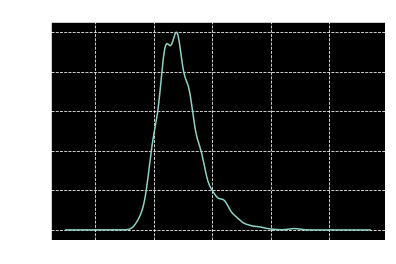

In [13]:
N_TRIALS = 10**3  # a million times
s = []
for _ in range(N_TRIALS):
    seq = game()
    s.append(longest_seq(seq))
    

import pandas as pd
%matplotlib inline


pd.Series(s).plot.kde(title='Kernel Density of longest subsequence lengths')